In [1]:
import pandas as pd
import numpy as np

# Load the data/either first or average
file_path = r'C:\DataAnalyticsProjects\IDATA\prob.kcal_avg_data.csv'
data = pd.read_csv(file_path)

In [2]:
data

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.023385,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.090145,0.053395,...,0.054465,0.014324,0.023204,0.052876,0.269800,0.014757,0.012444,0.000000,0.175118,0.080651
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000782,0.051077,0.070437,0.029420,...,0.028862,0.048624,0.011405,0.000000,0.212615,0.144701,0.000000,0.129159,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.010600,0.041204,0.000000,...,0.000000,0.003892,0.000000,0.000000,0.390341,0.086833,0.014896,0.036359,0.045923,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.076476,...,0.066103,0.002701,0.000000,0.000000,0.122497,0.540081,0.000000,0.022524,0.000000,0.012158
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.030797,0.090268,0.017212,0.000000,...,0.000000,0.000000,0.058760,0.055131,0.000000,0.138529,0.134207,0.126932,0.000000,0.039954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.000000,0.0,0.0,0.0,0.0,0.0,0.057961,0.062840,0.008101,0.029234,...,0.023205,0.026843,0.104083,0.068396,0.142106,0.114723,0.094699,0.042079,0.006557,0.000000
906,0.000000,0.0,0.0,0.0,0.0,0.0,0.028179,0.001339,0.000756,0.118608,...,0.051781,0.000000,0.000000,0.000000,0.000000,0.374737,0.119285,0.050057,0.043324,0.000000
907,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036300,0.000000,...,0.098127,0.000000,0.044003,0.053425,0.014061,0.280129,0.042278,0.000000,0.158596,0.000000
908,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.074042,0.048922,0.061048,...,0.071465,0.033960,0.013953,0.208107,0.095090,0.053088,0.066598,0.072712,0.000000,0.000000


In [3]:
import numpy as np
 
# vector v1 of dimension (2, 2)
v1 = np.array([[1, 2], [3, 4]])
 
# vector v2 of dimension (2, 2)
v2 = np.array([[1, 2], [3, 4]])
 
print("vector multiplication")
print(np.dot(v1, v2))
 
print("\nElementwise multiplication of two vector")
print(v1 * v2)

vector multiplication
[[ 7 10]
 [15 22]]

Elementwise multiplication of two vector
[[ 1  4]
 [ 9 16]]


In [4]:
np.isnan(data).any()

hour_0     False
hour_1     False
hour_2     False
hour_3     False
hour_4     False
hour_5     False
hour_6     False
hour_7     False
hour_8     False
hour_9     False
hour_10    False
hour_11    False
hour_12    False
hour_13    False
hour_14    False
hour_15    False
hour_16    False
hour_17    False
hour_18    False
hour_19    False
hour_20    False
hour_21    False
hour_22    False
hour_23    False
dtype: bool

##### Description of the Code
1. **EROT_Wasserstein Function:**
   - This function calculates the EROT Wasserstein distance between a sample sequence and cluster centroids. It iteratively updates the transport matrix until convergence based on a tolerance threshold. The result is the distance matrix and the transport matrix.

2. **kMeans_EROT_init Function:**
   - This function initializes the K-means clustering process using the K-means++ algorithm with EROT Wasserstein distance. It selects initial cluster centers and calculates distances from samples to these centers. The selection process is weighted based on the distances to ensure better initial seeding of clusters.

In [5]:
def EROT_Wasserstein(a, centroids, M=None, ground_d=None, tol=1e-3):
    """
    Calculates the entropy-regularized optimal transport (EROT) Wasserstein distance between a sample and cluster centroids.

    Parameters:
    a (numpy.ndarray): Sample sequence with dimension (len_1,).
    centroids (numpy.ndarray): Cluster centroids with dimension (K, len_2).
    M (numpy.ndarray): Cost matrix (optional).
    ground_d (numpy.ndarray): Ground distance matrix (optional).
    tol (float): Tolerance threshold for early stopping.

    Returns:
    D_sqrd (numpy.ndarray): EROT Wasserstein distances, dimension (K,).
    T (numpy.ndarray): Transport matrix.
    """
    # print(a.shape)
    len_a = a.shape[0]

    if ground_d is None:
        # Calculate ground distance matrix
        i, j = np.meshgrid(np.arange(len_a)+1, np.arange(len_a)+1)
        ground_d = (i - j) ** 2
        ground_d = ground_d / np.max(ground_d)
        eps = 1e-2
        tol = 1e-3
        M = np.exp(-ground_d / eps)

    # check dimension of centroids
    if centroids.ndim >= 2:
        K, _ = centroids.shape
    else:
        K = 1
    
    # print(centroids.shape)
    D_sqrd = np.zeros(K)
    maxiter = 100
    T = np.zeros((len_a, len_a))
    
    for cluster_id in range(K):
        compt = 0
        diff = float('inf')

        if centroids.ndim >= 2:
            b = centroids[cluster_id, :]
        else:
            b = centroids
            
        v = np.ones(len_a)
        while (compt < maxiter) and (diff > tol):
            compt += 1
            u = a / (M @ v)
            v = b / (M.T @ u)
            T = np.diag(v) @ M @ np.diag(u)
            D = np.sum(ground_d * T)
            if np.linalg.norm(np.array([np.sum(np.abs(np.sum(T, axis=1) - b))]), np.inf) < tol:
                break
        D_sqrd[cluster_id] = D
    
    return D_sqrd, T

In [6]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
M = X
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])
v = np.array([4, 5, 6])


In [7]:
uu = a / (M @ v)
print(uu)

[0.03125    0.02597403 0.02459016]


In [8]:
vv = b / (M.T @ uu)
print(vv)

[9.76316986 5.14017988 2.12356772]


In [9]:
np.diag(v) @ M @ np.diag(uu)

array([[0.125     , 0.20779221, 0.29508197],
       [0.625     , 0.64935065, 0.73770492],
       [1.3125    , 1.24675325, 1.32786885]])

In [10]:
def kMeans_EROT_init(A, K):
    """
    K-means++ initialization for K-means clustering using EROT Wasserstein distance.
    
    Parameters:
    A (numpy.ndarray): Input time series samples with dimension (num_samples, ts_len).
    K (int): Pre-defined number of clusters.

    Returns:
    init_id (numpy.ndarray): Initialized cluster membership IDs.
    init_center (numpy.ndarray): Initialized cluster centers.
    """
    N, len_ts = A.shape
    centers = np.zeros((K, len_ts))
    D = np.zeros((N, K))
    
    # Calculate ground distance matrix
    i, j = np.meshgrid(np.arange(len_ts)+1, np.arange(len_ts)+1)
    ground_d = (i - j) ** 2
    ground_d = ground_d / np.max(ground_d)
    eps = 1e-2
    tol = 1e-3
    M = np.exp(-ground_d / eps)
    U = M * ground_d

    rng = np.random.default_rng()
    centers[0, :] = A[rng.choice(N, 1), :]
    D[:, 0], _ = EROT_Wasserstein(centers[0, :], A, M, ground_d, tol)
    w = D[:, 0] / np.sum(D[:, 0])
    
    for k in range(1, K):
        centers[k, :] = A[rng.choice(N, 1, p=w), :]
        D[:, k], _ = EROT_Wasserstein(centers[k, :], A, M, ground_d, tol)
        tmp_min = np.min(D[:, :k+1], axis=1)
        min_id = np.argmin(D[:, :k+1], axis=1)
        w = tmp_min / np.sum(tmp_min)
    
    init_id = min_id
    init_center = centers
    
    return init_id, init_center

### This code computes the centroid of a set of histograms using the entropy regularized optimal transport (EROT) barycenter method. The process involves the following steps:

1. **Parameter Initialization:**
   - The function `EROT_baryavg` takes input histograms `X`, a cost matrix `M`, a flag `useGPU` to determine whether to use GPU for computation, a tolerance `tol` for stopping criteria, and optional weights for weighted barycenter computation.
   
2. **Handling Optional Parameters:**
   - If `weights` is not provided, it defaults to equal weights for all histograms. Weights are reshaped to ensure they are column vectors.

3. **GPU Computation:**
   - If `useGPU` is set to `True`, the function uses `cupy` for GPU-accelerated computation.

4. **Initialization:**
   - The function initializes variables and performs the first projection.

5. **Iterative Computation:**
   - The main loop iteratively updates the transport matrix `T` and the scaling vector `u` until the variance of the columns of `T` is minimized or the maximum number of iterations is reached.

6. **Result Computation:**
   - The mean of the transport matrix `T` along its columns is computed to get the final centroid.

In [11]:
def EROT_baryavg(X, M, useGPU=False, tol=1e-6, weights=None):
    """
    Computes the centroid for entropy regularized barycenter.
    
    Parameters:
    X (numpy.ndarray): N histograms of size d, dimension (N, d).
    M (numpy.ndarray): Cost matrix.
    useGPU (bool): Whether to use GPU for computation.
    tol (float): Stopping tolerance criterion.
    weights (numpy.ndarray): Weights for weighted barycenter (optional).

    Returns:
    centroid (numpy.ndarray): Computed centroid.
    """
    n, d = X.shape
    print(n,d)
    if weights is None:
        weights = np.ones((n, 1)) / n
    else:
        weights = weights.reshape(n, 1)  # Ensure weights is a column vector

    if useGPU:
        import cupy as cp
        X = cp.asarray(X)
        M = cp.asarray(M)

    M[M < 1e-300] = 1e-300
    compt = 0
    diff = float('inf')
    Max_iter = 1000

    # Initial projection: MATLAB: T = M * (bsxfun(@rdivide,X',(sum(M))'));
    
    # # Equivalent to: sum(M)
    sum_M = np.sum(M, axis=0)
    T = M @ (np.apply_along_axis(rdivide_sum_M, 0, X.T, sum_M))
    
    # # Equivalent to: bsxfun(@rdivide, X', (sum(M))')
    # # X.T is the transpose of X
    # # Broadcasting is used for element-wise division
    # X_divided = X.T / sum_M[:, None]
    # print(X_divided)
    
    # # X_divided = X_divided.reshape(-1, X_divided.shape[-1])
    
    # # Equivalent to: matrix multiplication * (result of bsxfun)
    # T = M @ X_divided
    # # print(f"Initial T shape: {T.shape}")
    
    # MATLAB: u = T / np.exp(np.log(T) @ weights)
    # Compute exp(log(T) * weights)
    exp_log_T_weights = np.exp(np.log(T) @ weights)

    # Perform element-wise left division of T by exp(log(T) * weights)
    # u = exp_log_T_weights[:, None] / T
    # u = np.apply_along_axis(ldivide_exp_T, 0, T, exp_log_T_weights)
    u = exp_log_T_weights / T
#     u = u.reshape(-1, u.shape[-1])
    print(f"Initial sum_M shape: {sum_M.shape}")
    print(f"Initial X shape: {X.shape}")
    print(f"Initial M shape: {M.shape}")
    print(f"Initial T shape: {T.shape}")
    print(f"Initial u shape: {u.shape}")
    print(f"Initial weights shape: {weights.shape}")
    
    # Main loop
    while (compt < Max_iter) and (diff > tol):
        compt += 1
        T_prev = T.copy()
        T = u * (M @ (X.T / (M.T @ u)))

#         print(f"Initial T shape: {T.shape}")
#         print(f"Initial weight shape: {T.shape}")
        
        # Matlab: u = bsxfun(@times,u,exp(log(T)*weights))./T;
        exp_tmp = np.exp(np.log(T) @ weights)
        u_times_exp = u * exp_tmp
        # u_times_exp = u * exp_tmp[:, None]
        # u_times_exp = np.apply_along_axis(times_u_exp, 0, u, exp_tmp)
        u = u_times_exp / T
#         # Debugging statements to check shapes
        print(f"Iteration {compt}, T shape: {weights.shape}, u shape: {u.shape}")

        diff = np.linalg.norm(T - T_prev)

    tmp = np.mean(T, axis=1)  # Compute the mean of T along columns
    centroid = tmp

    if useGPU:
        centroid = cp.asnumpy(centroid)

    return centroid

In [12]:
def rdivide_sum_M(a, sum_M):
    # print(a)
    # print(sum_M)
    return a / sum_M

In [13]:
def ldivide_exp_T(T, exp_log_T_weights):
    # print(a)
    # print(sum_M)
    return exp_log_T_weights / T

In [14]:
def times_u_exp(u, exp_log_T_weights):
    # print(a)
    # print(sum_M)
    return u * exp_log_T_weights

### This code implements the K-means clustering algorithm using 2-Wasserstein distance for time-series data and entropy-regularized optimal transport (EROT) barycenter averaging for computing cluster centroids.

1. **kMeans_EROT Function:**
   - The function initializes cluster membership IDs, computes cluster centroids using EROT barycenter averaging, and iteratively refines the clusters until convergence or reaching the maximum number of iterations.

2. **EROT Barycenter Averaging:**
   - The `EROT_baryavg` function calculates the EROT barycenter averaging for a given cluster using multiple iterations until convergence.

3. **EROT Wasserstein Distance Calculation:**
   - The `EROT_Wasserstein` function computes the EROT Wasserstein distance between a sample sequence and multiple cluster centroids using the given cost matrix and ground distance matrix.

4. **Helper Functions:**
   - Helper functions such as `EROT_baryavg` and `EROT_Wasserstein` are provided to perform specific tasks required in the clustering algorithm.

In [15]:
def kMeans_EROT(A, K, best_init_id=None):
    """
    K-means clustering using 2-Wasserstein distance and barycenter averaging.
    
    Parameters:
    A (numpy.ndarray): Input time series samples, dimension (num_samples, ts_len).
    K (int): Pre-defined number of clusters.
    best_init_id (numpy.ndarray): Initialized cluster membership IDs (optional).

    Returns:
    member_id (numpy.ndarray): Clustering output cluster membership IDs.
    centers (numpy.ndarray): Cluster centroids, dimension (K, ts_len).
    obj_opt (float): Sum of variance of all clusters.
    clusters (numpy.ndarray): Sizes of each cluster.
    """
    N, len_ts = A.shape
    if best_init_id is None:
        member_id = np.ceil(K * np.random.rand(N)).astype(int) - 1
    else:
        member_id = best_init_id

    centers = np.zeros((K, len_ts))
    Dist_sqrd = np.zeros((N, K))
    
    # Ground distance matrix
    i, j = np.meshgrid(np.arange(len_ts)+1, np.arange(len_ts)+1)
    ground_d = (i - j) ** 2
    ground_d = ground_d / np.max(ground_d)
    
    # Barycenter parameters
    Max_iter = 100
    eps = 1e-2
    useGPU = False
    tol = 1e-3
    obj = np.inf
    M = np.exp(-ground_d / eps)
    U = M * ground_d

    for iter in range(Max_iter):
        print(f"Iteration: {iter + 1}")
        prev_mem = member_id.copy()
        prev_obj = obj

        for k in range(K):
            if np.sum(member_id == k) == 0:
                continue
            else:
                centers[k, :] = EROT_baryavg(A[member_id == k], M, useGPU, tol)

        for i in range(N):
            Dist_sqrd[i, :], _ = EROT_Wasserstein(A[i, :], centers, M, ground_d, tol)

        dist_to_center = np.min(Dist_sqrd, axis=1)
        member_id = np.argmin(Dist_sqrd, axis=1)
        obj = np.sum(dist_to_center)
        print(f"Objective: {obj}")

        if np.linalg.norm(prev_mem - member_id) == 0 or abs(prev_obj - obj) < 1e-3 * obj:
            break

    # Save the optimal objective
    obj_opt = np.sum(dist_to_center)
    
    # Save how many samples in each cluster
    clusters = np.array([np.sum(member_id == k) for k in range(K)])

    return member_id, centers, obj_opt, clusters

### Description of the Code
This code calculates the constrained Dynamic Time Warping (cDTW) distance between a sample sequence and multiple cluster centroids. The cDTW distance is a measure of similarity between two sequences that allows for warping of the time axis under a specified constraint (window).

1. **Parameter Initialization:**
   - The function `cDTW` takes a sample sequence `a`, cluster centroids, and a window constraint as inputs.

2. **Warping Matrix Initialization:**
   - The warping matrix `D` is initialized with infinity, except for the starting point `D[0, 0]` which is set to 0.

3. **Dynamic Programming for cDTW:**
   - The function iterates through each point in the sample sequence and the centroids within the specified window constraint. It computes the point-to-point local cost and updates the warping matrix using the dynamic programming transition function.

4. **Distance Calculation:**
   - The cDTW distance for each centroid is computed as the square root of the accumulated cost in the warping matrix.

In [16]:
def cDTW(a, centroids, window):
    """
    Calculates the constrained Dynamic Time Warping (cDTW) distance between one sample and cluster centroids.
    
    Parameters:
    a (numpy.ndarray): Sample sequence with dimension (len_1,).
    centroids (numpy.ndarray): K cluster centroids with dimension (K, len_2).
    window (int): Window constraint on time warping band (Sakoe and Chiba, 1978).

    Returns:
    Dist (numpy.ndarray): cDTW distances to each centroid, dimension (K,).
    D (numpy.ndarray): The warping matrix.
    """
    len_1 = a.shape[0]
    K, len_2 = centroids.shape
    Dist = np.zeros(K)

    for cluster_id in range(K):
        # Initialize the warping matrix with infinity
        D = np.ones((len_1 + 1, len_2 + 1)) * np.inf
        D[0, 0] = 0

        # Compute the cDTW distance using dynamic programming
        for i in range(1, len_1 + 1):
            for j in range(max(1, i - window), min(len_2 + 1, i + window + 1)):
                p = a[i - 1]
                q = centroids[cluster_id, j - 1]
                cost = (p - q) ** 2  # Point-to-point local cost
                D[i, j] = cost + min(D[i - 1, j], D[i - 1, j - 1], D[i, j - 1])  # DP transition function

        Dist[cluster_id] = np.sqrt(D[len_1, len_2])

    return Dist, D




### Description of the Code
This code computes the Davies-Bouldin (DB) index for evaluating the quality of clustering. The process involves the following steps:

1. **Parameter Initialization:**
   - The function `DB_index` takes cluster membership IDs, cluster centers, input samples, cluster sizes, cost matrix, ground distance matrix, tolerance for EROT_Wasserstein, and a distance metric ID as inputs.

2. **Distance Calculation:**
   - Depending on the distance metric ID (`dist_id`), the function computes the intra-cluster and inter-cluster distances using either the EROT_Wasserstein distance or the constrained Dynamic Time Warping (cDTW) distance.

3. **DB Index Calculation:**
   - The function calculates the scatter within clusters and the distances between cluster centers. It then computes the DB index, which is the average of the maximum ratio of intra-cluster scatter to inter-cluster distance for each cluster.

The example usage demonstrates how to call the function with sample data and display the computed DB index using `ace_tools`. Note that the actual implementation of `EROT_Wasserstein` and `cDTW` functions should be provided for the code to work correctly.

In [17]:
def DB_index(member_id, centers, dat_input, clusters, M, ground_d, tol, dist_id):
    """
    Computes the Davies-Bouldin (DB) index for clustering evaluation.
    
    Parameters:
    member_id (numpy.ndarray): Cluster membership IDs, dimension (N,).
    centers (numpy.ndarray): Cluster centers, dimension (K, ts_len).
    dat_input (numpy.ndarray): Input samples.
    clusters (numpy.ndarray): Sizes of each cluster, dimension (K,).
    M (numpy.ndarray): Cost matrix.
    ground_d (numpy.ndarray): Ground distance matrix.
    tol (float): Tolerance for EROT_Wasserstein.
    dist_id (int): Distance metric ID (1 for OT distance, 2 for DTW distance).
    
    Returns:
    index (float): Calculated DB index.
    """
    K = centers.shape[0]
    S = np.zeros(K)
    D = np.zeros((K, K))
    diff = np.zeros((K, K))
    
    if dist_id == 1:  # OT distance
        for k in range(K):
            Dist_sqrd, _ = EROT_Wasserstein(centers[k, :], dat_input[member_id == k, :], M, ground_d, tol)
            S[k] = np.sqrt(np.sum(Dist_sqrd) / clusters[k])

        for i in range(K):
            for j in range(i+1):
                D[i, j], _ = EROT_Wasserstein(centers[i, :], centers[j, :], M, ground_d, tol)
                D[j, i] = D[i, j]
                if j != i:
                    diff[i, j] = (S[i] + S[j]) / np.sqrt(D[i, j])
                    diff[j, i] = diff[i, j]

    elif dist_id == 2:  # DTW distance
        window = 24
        for k in range(K):
            Dist, _ = cDTW(centers[k, :], dat_input[member_id == k, :], window)
            S[k] = np.sum(Dist) / clusters[k]

        for i in range(K):
            for j in range(i+1):
                D[i, j], _ = cDTW(centers[i, :], centers[j, :], window)
                D[j, i] = D[i, j]
                if j != i:
                    diff[i, j] = (S[i] + S[j]) / D[i, j]
                    diff[j, i] = diff[i, j]

    else:
        raise ValueError("Invalid distance metric ID. Use 1 for OT distance or 2 for DTW distance.")
    
    # Calculate DB index
    R = np.max(diff, axis=1)
    index = np.mean(R)
    
    return index

### Description of the Code
This code computes the Calinski-Harabasz (CH) index for evaluating the quality of clustering. The CH index is a ratio of the between-cluster dispersion to the within-cluster dispersion, scaled by the number of clusters and data points. The process involves the following steps:

1. **Parameter Initialization:**
   - The function `CH_index` takes cluster membership IDs, the spread of cluster centers, the sum of variances within clusters (`obj_opt`), and the sizes of each cluster as inputs.

2. **Between-cluster Variation (BI):**
   - The function calculates the between-cluster variation (`BI`) by summing the product of cluster sizes and the spread of cluster centers.

3. **Within-cluster Variation (WI):**
   - The within-cluster variation (`WI`) is directly given by `obj_opt`.

4. **CH Index Calculation:**
   - The function computes the CH index as the ratio of the between-cluster variation to the within-cluster variation, scaled by the number of clusters and data points.

5. **Error Handling:**
   - If there is only one cluster, the function raises an error indicating that the CH index is not valid.

In [18]:
def CH_index(member_id, center_spread, obj_opt, clusters):
    """
    Computes the Calinski-Harabasz (CH) index for clustering evaluation.
    
    Parameters:
    member_id (numpy.ndarray): Cluster membership IDs, dimension (N,).
    center_spread (numpy.ndarray): Spread of centers W_2^2(centers(k,:), center_all), dimension (K,).
    obj_opt (float): Sum of variance of all clusters.
    clusters (numpy.ndarray): Sizes of each cluster, dimension (K,).

    Returns:
    index (float): Calculated CH index.
    """
    N = len(member_id)
    K = center_spread.shape[0]

    # Between-cluster variation (BI)
    BI = np.sum(clusters * center_spread)

    # Within-cluster variation (WI)
    WI = obj_opt

    if K != 1:
        index = (N - K) / (K - 1) * BI / WI
    else:
        raise ValueError("Only one cluster, CH index not valid.")
    
    return index

### Description of the Code
This code implements the DTW Barycenter Averaging (DBA) algorithm, which computes an average sequence from a set of sequences using Dynamic Time Warping (DTW). The process involves the following steps:

1. **DBA Function:**
   - The main function `DBA` initializes the average sequence with the first sequence in the input and performs a specified number of iterations of the DBA algorithm.

2. **DBA One Iteration Function:**
   - The `DBA_one_iteration` function performs one iteration of the DBA algorithm. It aligns each sequence to the current average sequence using DTW and updates the average sequence based on the alignment.

3. **Distance Calculation:**
   - The `distanceTo` function computes the squared Euclidean distance between two points.

4. **Dynamic Programming:**
   - The cost and path matrices are used to compute the DTW alignment between sequences and the current average sequence.

5. **Updating the Average Sequence:**
   - The average sequence is updated by averaging the points in the aligned sequences.

6. **ArgMin3 Function:**
   - The `ArgMin3` function finds the index of the minimum value among three given values.

In [19]:
def DBA(sequences, num_iterations=15):
    """
    Performs the DTW Barycenter Averaging (DBA) algorithm to compute the average sequence.
    
    Parameters:
    sequences (numpy.ndarray): Input sequences, dimension (N, len_seq).
    num_iterations (int): Number of iterations for DBA.

    Returns:
    average (numpy.ndarray): The average sequence.
    """
    average = sequences[0, :]
    for _ in range(num_iterations):
        average = DBA_one_iteration(average, sequences)
    return average

def DBA_one_iteration(averageS, sequences):
    """
    Performs one iteration of the DBA algorithm.
    
    Parameters:
    averageS (numpy.ndarray): Current average sequence.
    sequences (numpy.ndarray): Input sequences.

    Returns:
    average (numpy.ndarray): Updated average sequence.
    """
    tupleAssociation = [[] for _ in range(averageS.shape[0])]
    costMatrix = np.zeros((averageS.shape[0], sequences.shape[1]))
    pathMatrix = np.zeros((averageS.shape[0], sequences.shape[1]), dtype=int)

    for k in range(sequences.shape[0]):
        sequence = sequences[k, :]
        costMatrix[0, 0] = distanceTo(averageS[0], sequence[0])
        pathMatrix[0, 0] = -1

        for i in range(1, averageS.shape[0]):
            costMatrix[i, 0] = costMatrix[i-1, 0] + distanceTo(averageS[i], sequence[0])
            pathMatrix[i, 0] = 2
        
        for j in range(1, sequence.shape[0]):
            costMatrix[0, j] = costMatrix[0, j-1] + distanceTo(sequence[j], averageS[0])
            pathMatrix[0, j] = 1
        
        for i in range(1, averageS.shape[0]):
            for j in range(1, sequence.shape[0]):
                min_index = ArgMin3(costMatrix[i-1, j-1], costMatrix[i, j-1], costMatrix[i-1, j])
                pathMatrix[i, j] = min_index
                
                if min_index == 0:
                    min_cost = costMatrix[i-1, j-1]
                elif min_index == 1:
                    min_cost = costMatrix[i, j-1]
                else:
                    min_cost = costMatrix[i-1, j]
                
                costMatrix[i, j] = min_cost + distanceTo(averageS[i], sequence[j])

        i = averageS.shape[0] - 1
        j = sequence.shape[0] - 1

        while True:
            tupleAssociation[i].append(sequence[j])
            if pathMatrix[i, j] == 0:
                i -= 1
                j -= 1
            elif pathMatrix[i, j] == 1:
                j -= 1
            elif pathMatrix[i, j] == 2:
                i -= 1
            else:
                break

    for t in range(averageS.shape[0]):
        averageS[t] = np.mean(tupleAssociation[t])
    
    return averageS

def ArgMin3(a, b, c):
    """
    Finds the index of the minimum value among a, b, and c.
    
    Parameters:
    a (float): First value.
    b (float): Second value.
    c (float): Third value.

    Returns:
    int: Index of the minimum value.
    """
    if a < b:
        return 0 if a < c else 2
    else:
        return 1 if b < c else 2

def distanceTo(a, b):
    """
    Computes the squared Euclidean distance between two points.
    
    Parameters:
    a (float): First point.
    b (float): Second point.

    Returns:
    float: Squared Euclidean distance.
    """
    return (a - b) ** 2


### Description of the Code
This code calculates the constrained Dynamic Time Warping (cDTW) distance between a sample sequence and multiple cluster centroids. The cDTW distance is a measure of similarity between two sequences that allows for warping of the time axis under a specified constraint (window).

1. **Parameter Initialization:**
   - The function `cDTW` takes a sample sequence `a`, cluster centroids, and a window constraint as inputs.

2. **Warping Matrix Initialization:**
   - The warping matrix `D` is initialized with infinity, except for the starting point `D[0, 0]` which is set to 0.

3. **Dynamic Programming for cDTW:**
   - The function iterates through each point in the sample sequence and the centroids within the specified window constraint. It computes the point-to-point local cost and updates the warping matrix using the dynamic programming transition function.

4. **Distance Calculation:**
   - The cDTW distance for each centroid is computed as the square root of the accumulated cost in the warping matrix.


In [20]:
def cDTW(a, centroids, window):
    """
    Calculates the constrained Dynamic Time Warping (cDTW) distance between one sample and cluster centroids.
    
    Parameters:
    a (numpy.ndarray): Sample sequence with dimension (len_1,).
    centroids (numpy.ndarray): K cluster centroids with dimension (K, len_2).
    window (int): Window constraint on time warping band (Sakoe and Chiba, 1978).

    Returns:
    Dist (numpy.ndarray): cDTW distances to each centroid, dimension (K,).
    D (numpy.ndarray): The warping matrix.
    """
    len_1 = a.shape[0]
    K, len_2 = centroids.shape
    Dist = np.zeros(K)

    for cluster_id in range(K):
        # Initialize the warping matrix with infinity
        D = np.ones((len_1 + 1, len_2 + 1)) * np.inf
        D[0, 0] = 0

        # Compute the cDTW distance using dynamic programming
        for i in range(1, len_1 + 1):
            for j in range(max(1, i - window), min(len_2 + 1, i + window + 1)):
                p = a[i - 1]
                q = centroids[cluster_id, j - 1]
                cost = (p - q) ** 2  # Point-to-point local cost
                D[i, j] = cost + min(D[i - 1, j], D[i - 1, j - 1], D[i, j - 1])  # DP transition function

        Dist[cluster_id] = np.sqrt(D[len_1, len_2])

    return Dist, D

### Description of the Code
This code initializes the K-means clustering process using the K-means++ algorithm with constrained Dynamic Time Warping (cDTW) distance. The process involves the following steps:

1. **Parameter Initialization:**
   - The function `kMeans_DTW_init` takes input time series samples `A` and the number of clusters `K` as parameters.

2. **First Center Selection:**
   - A random sample is selected as the first cluster center using a random number generator for reproducibility.

3. **Distance Calculation:**
   - The `cDTW` function calculates the constrained Dynamic Time Warping (cDTW) distance between the first center and all samples.

4. **Weighted Sampling:**
   - Distances are normalized to create a probability distribution for selecting the next cluster center, ensuring better initialization.

5. **Iteration:**
   - The process repeats for each cluster, updating the centers and distances iteratively.

6. **Final Cluster Assignment:**
   - Each sample is assigned to the nearest cluster based on the minimum distance.


In [21]:
def kMeans_DTW_init(A, K):
    """
    K-means++ initialization for K-means clustering using constrained DTW (cDTW) distance.
    
    Parameters:
    A (numpy.ndarray): Input time series samples, dimension (num_samples, ts_len).
    K (int): Pre-defined number of clusters.

    Returns:
    init_id (numpy.ndarray): Initialized cluster membership IDs.
    init_center (numpy.ndarray): Initialized cluster centers.
    """
    N, len_ts = A.shape
    centers = np.zeros((K, len_ts))
    D = np.zeros((N, K))
    
    rng = np.random.default_rng()
    centers[0, :] = A[rng.choice(N, 1), :]
    window = 24
    D[:, 0], _ = cDTW(centers[0, :], A, window)
    w = D[:, 0] / np.sum(D[:, 0])
    
    for k in range(1, K):
        centers[k, :] = A[rng.choice(N, 1, p=w), :]
        D[:, k], _ = cDTW(centers[k, :], A, window)
        tmp_min = np.min(D[:, :k+1], axis=1)
        w = tmp_min / np.sum(tmp_min)
    
    init_id = np.argmin(D, axis=1)
    init_center = centers
    
    return init_id, init_center

### Description of the Code

 **DTW Barycenter Averaging Function:**
   - The `DTW_baryavg` function takes cluster membership IDs, input time series samples, and a cluster index as parameters. It extracts the data points belonging to the specified cluster and computes the DTW barycenter using the DBA algorithm.


In [22]:
def DTW_baryavg(member_id, A, k):
    """
    Computes the DTW barycenter for a specific cluster.
    
    Parameters:
    member_id (numpy.ndarray): Cluster membership IDs.
    A (numpy.ndarray): Input time series samples.
    k (int): Cluster index.

    Returns:
    ksc (numpy.ndarray): The DTW barycenter for cluster k.
    """
    cluster_data = A[member_id == k]

    if cluster_data.shape[0] == 0:
        return np.zeros(A.shape[1])

    return DBA(cluster_data)

**kMeans_DTW Function:**
   - The function initializes cluster membership IDs, computes cluster centroids using DBA, and iteratively refines the clusters until convergence or reaching the maximum number of iterations.

In [23]:
def kMeans_DTW(A, K, best_init_id=None):
    """
    K-means clustering using constrained DTW (cDTW) distance and DBA for time-series averaging.
    
    Parameters:
    A (numpy.ndarray): Input time series samples, dimension (num_samples, ts_len).
    K (int): Pre-defined number of clusters.
    best_init_id (numpy.ndarray): Initialized cluster membership IDs (optional).

    Returns:
    member_id (numpy.ndarray): Clustering output cluster membership IDs.
    centers (numpy.ndarray): Cluster centroids, dimension (K, ts_len).
    obj_opt (float): Sum of variance of all clusters.
    clusters (numpy.ndarray): Sizes of each cluster.
    """
    m, len_ts = A.shape
    if best_init_id is None:
        member_id = np.ceil(K * np.random.rand(m)).astype(int)
    else:
        member_id = best_init_id

    centers = np.zeros((K, len_ts))
    Dist = np.zeros((m, K))
    Max_iter = 100
    window = len_ts
    obj = np.inf

    for iter in range(Max_iter):
        print(f"Iteration: {iter + 1}")
        prev_mem = member_id.copy()
        prev_obj = obj

        for k in range(K):
            centers[k, :] = DTW_baryavg(member_id, A, k)

        for i in range(m):
            Dist[i, :], _ = cDTW(A[i, :], centers, window)

        dist_to_center = np.min(Dist, axis=1)
        member_id = np.argmin(Dist, axis=1)
        obj = np.sum(dist_to_center ** 2)
        print(f"Objective: {obj}")

        if np.linalg.norm(prev_mem - member_id) == 0 or abs(obj - prev_obj) < 1e-3 * obj:
            break

    obj_opt = obj
    clusters = np.array([np.sum(member_id == k) for k in range(K)])

    return member_id, centers, obj_opt, clusters

### Description of the Code
This code optimizes the number of clusters \( K \) for K-means clustering using Davies-Bouldin (DB) and Calinski-Harabasz (CH) indices. The process involves the following steps:

1. **Parameter Initialization:**
   - The function `optim_K` takes input time series samples, ground distance matrix, GPU usage flag, cost matrix, tolerance, minimum and maximum number of clusters, and distance metric ID as parameters.

2. **Distance Metric Handling:**
   - The function handles two distance metrics: OT distance and DTW distance. For each metric, the function performs K-means clustering and computes the DB and CH indices for each value of \( K \) from `minK` to `maxK`.

3. **Initialization and Clustering:**
   - For each value of \( K \), the function initializes the clusters using K-means++ and performs K-means clustering using either the OT or DTW distance.

4. **Barycenter Calculation:**
   - The function computes the barycenter of all samples and the spread of cluster centers.

5. **Index Calculation:**
   - The function calculates the DB and CH indices for each value of \( K \) to evaluate the clustering quality.

6. **Return Values:**
   - The function returns the sum of variances of all clusters (obj), DB indices, and CH indices for each value of \( K \).

In [24]:
def optim_K(dat_input, ground_d, useGPU, M, tol, minK, maxK, dist_id):
    """
    Optimizes the number of clusters (K) for K-means clustering using DB and CH indices.
    
    Parameters:
    dat_input (numpy.ndarray): Input time series samples, dimension (num_samples, ts_len).
    ground_d (numpy.ndarray): Ground distance matrix.
    useGPU (bool): Whether to use GPU for computation.
    M (numpy.ndarray): Cost matrix.
    tol (float): Tolerance for convergence.
    minK (int): Minimum number of clusters.
    maxK (int): Maximum number of clusters.
    dist_id (int): Distance metric ID (1 for OT distance, 2 for DTW distance).

    Returns:
    obj (numpy.ndarray): Sum of variance of all clusters for each K.
    DB (numpy.ndarray): Davies-Bouldin index for each K.
    CH (numpy.ndarray): Calinski-Harabasz index for each K.
    """
    num_K = maxK - minK + 1
    CH = np.zeros(num_K)
    DB = np.zeros(num_K)
    obj = np.zeros(num_K)

    if dist_id == 1:  # OT distance
        for K in range(minK, maxK + 1):
            best_init_id, _ = kMeans_EROT_init(dat_input, K)
            member_id, centers, obj_opt, clusters = kMeans_EROT(dat_input, K, best_init_id)
            center_all = EROT_baryavg(dat_input, M, useGPU, tol)
            
            center_spread = np.zeros(K)
            for k in range(K):
                # print(centers.shape, center_all.shape, M.shape, ground_d.shape)
                tmp, _ = EROT_Wasserstein(centers[k, :], center_all, M, ground_d, tol)
                center_spread[k] = tmp

            DB[K - minK] = DB_index(member_id, centers, dat_input, clusters, M, ground_d, tol, dist_id)
            CH[K - minK] = CH_index(member_id, center_spread, obj_opt, clusters)
            obj[K - minK] = obj_opt
            print(DB, CH, M.shape, obj)

    elif dist_id == 2:  # DTW distance
        window = 24
        for K in range(minK, maxK + 1):
            best_init_id, _ = kMeans_DTW_init(dat_input, K)
            member_id, centers, obj_opt, clusters = kMeans_DTW(dat_input, K, best_init_id)
            center_all = DBA(dat_input)

            center_spread = np.zeros(K)
            for k in range(K):
                tmp, _ = cDTW(centers[k, :], center_all, window)
                center_spread[k] = tmp ** 2

            DB[K - minK] = DB_index(member_id, centers, dat_input, clusters, M, ground_d, tol, dist_id)
            CH[K - minK] = CH_index(member_id, center_spread, obj_opt, clusters)
            obj[K - minK] = obj_opt

    else:
        return None, None, None

    return obj, DB, CH

In [25]:
import numpy as np
import pandas as pd

# Assuming data is a pandas DataFrame
X = data.values

num_sample, ts_len = X.shape
# Shift original data to avoid 0's, and renormalize to get sum of 1
delta = 1e-6
X_tmp = X + delta
X_shift = X_tmp / X_tmp.sum(axis=1, keepdims=True)  # the input target

# Create the output matrix
output_idx = np.zeros((num_sample, 3))

# Example usage: Display some of the loaded and processed data
print(f"Number of samples: {num_sample}, Time series length: {ts_len}")
print(f"First few rows of shifted and normalized data:\n{X_shift[:5]}")

Number of samples: 910, Time series length: 24
First few rows of shifted and normalized data:
[[2.33854505e-02 9.99976001e-07 9.99976001e-07 9.99976001e-07
  9.99976001e-07 9.99976001e-07 9.99976001e-07 9.99976001e-07
  9.01436877e-02 5.33948859e-02 8.98450719e-02 1.25764786e-03
  4.43338023e-02 9.99976001e-07 5.44647044e-02 1.43245123e-02
  2.32046108e-02 5.28753745e-02 2.69794723e-01 1.47572629e-02
  1.24447480e-02 9.99976001e-07 1.75114907e-01 8.06496109e-02]
 [9.99976001e-07 9.99976001e-07 9.99976001e-07 9.99976001e-07
  9.99976001e-07 9.99976001e-07 7.83166096e-04 5.10771831e-02
  7.04360518e-02 2.94201215e-02 8.54809592e-02 3.68769597e-02
  9.99976001e-07 1.50556876e-01 2.88625114e-02 4.86239407e-02
  1.14052392e-02 9.99976001e-07 2.12610955e-01 1.44698406e-01
  9.99976001e-07 1.29156631e-01 9.99976001e-07 9.99976001e-07]
 [9.99976001e-07 9.99976001e-07 9.99976001e-07 9.99976001e-07
  9.99976001e-07 9.99976001e-07 9.99976001e-07 1.06009598e-02
  4.12041602e-02 9.99976001e-07 9.99

In [26]:
X_shift.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [27]:
X_shift[0,:]

array([2.33854505e-02, 9.99976001e-07, 9.99976001e-07, 9.99976001e-07,
       9.99976001e-07, 9.99976001e-07, 9.99976001e-07, 9.99976001e-07,
       9.01436877e-02, 5.33948859e-02, 8.98450719e-02, 1.25764786e-03,
       4.43338023e-02, 9.99976001e-07, 5.44647044e-02, 1.43245123e-02,
       2.32046108e-02, 5.28753745e-02, 2.69794723e-01, 1.47572629e-02,
       1.24447480e-02, 9.99976001e-07, 1.75114907e-01, 8.06496109e-02])

Iteration: 1
614 24
Initial sum_M shape: (24,)
Initial X shape: (614, 24)
Initial M shape: (24, 24)
Initial T shape: (24, 614)
Initial u shape: (24, 614)
Initial weights shape: (614, 1)
Iteration 1, T shape: (614, 1), u shape: (24, 614)
Iteration 2, T shape: (614, 1), u shape: (24, 614)
Iteration 3, T shape: (614, 1), u shape: (24, 614)
Iteration 4, T shape: (614, 1), u shape: (24, 614)
Iteration 5, T shape: (614, 1), u shape: (24, 614)
Iteration 6, T shape: (614, 1), u shape: (24, 614)
Iteration 7, T shape: (614, 1), u shape: (24, 614)
Iteration 8, T shape: (614, 1), u shape: (24, 614)
Iteration 9, T shape: (614, 1), u shape: (24, 614)
Iteration 10, T shape: (614, 1), u shape: (24, 614)
Iteration 11, T shape: (614, 1), u shape: (24, 614)
Iteration 12, T shape: (614, 1), u shape: (24, 614)
Iteration 13, T shape: (614, 1), u shape: (24, 614)
Iteration 14, T shape: (614, 1), u shape: (24, 614)
Iteration 15, T shape: (614, 1), u shape: (24, 614)
Iteration 16, T shape: (614, 1), u shape: (

C:\Users\YYU\AppData\Local\Temp\5\ipykernel_7452\3833174642.py:26: RuntimeWarning: invalid value encountered in double_scalars
  S[k] = np.sqrt(np.sum(Dist_sqrd) / clusters[k])


Iteration: 1
83 24
Initial sum_M shape: (24,)
Initial X shape: (83, 24)
Initial M shape: (24, 24)
Initial T shape: (24, 83)
Initial u shape: (24, 83)
Initial weights shape: (83, 1)
Iteration 1, T shape: (83, 1), u shape: (24, 83)
Iteration 2, T shape: (83, 1), u shape: (24, 83)
Iteration 3, T shape: (83, 1), u shape: (24, 83)
Iteration 4, T shape: (83, 1), u shape: (24, 83)
Iteration 5, T shape: (83, 1), u shape: (24, 83)
Iteration 6, T shape: (83, 1), u shape: (24, 83)
Iteration 7, T shape: (83, 1), u shape: (24, 83)
Iteration 8, T shape: (83, 1), u shape: (24, 83)
Iteration 9, T shape: (83, 1), u shape: (24, 83)
Iteration 10, T shape: (83, 1), u shape: (24, 83)
Iteration 11, T shape: (83, 1), u shape: (24, 83)
Iteration 12, T shape: (83, 1), u shape: (24, 83)
Iteration 13, T shape: (83, 1), u shape: (24, 83)
Iteration 14, T shape: (83, 1), u shape: (24, 83)
Iteration 15, T shape: (83, 1), u shape: (24, 83)
Iteration 16, T shape: (83, 1), u shape: (24, 83)
Iteration 17, T shape: (83, 

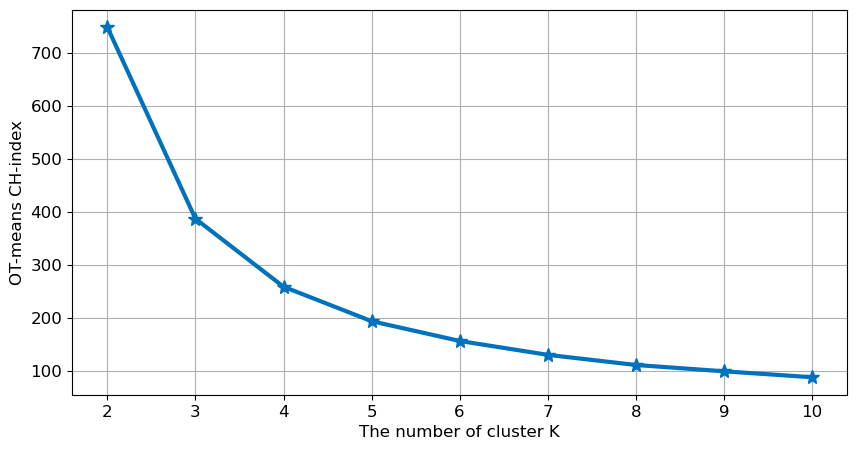

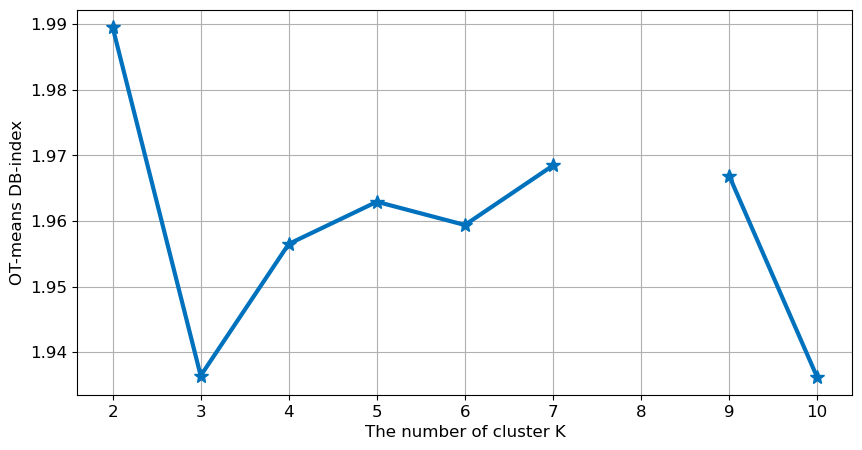

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import ot
from sklearn.cluster import KMeans

# OT parameters preparation
ts_len = X_shift.shape[1]
i, j = np.meshgrid(np.arange(ts_len)+1, np.arange(ts_len)+1)
ground_d = (i - j) ** 2
ground_d = ground_d / np.max(ground_d)
useGPU = False
eps = 1e-2
tol = 1e-3
M = np.exp(-ground_d / eps)

# Choose the optimal K
minK, maxK = 2, 10
obj, DB, CH = optim_K(X_shift, ground_d, useGPU, M, tol, minK, maxK, 1)

# Visualization of DB and CH index with varying K
plt.figure(figsize=(10, 5))
plt.plot(range(minK, maxK + 1), CH, '-*', color=[0, 0.447, 0.741], linewidth=3, markersize=10)
plt.xlabel('The number of cluster K', fontsize=12)
plt.ylabel('OT-means CH-index', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualization of DB and CH index with varying K
plt.figure(figsize=(10, 5))
plt.plot(range(minK, maxK + 1), DB, '-*', color=[0, 0.447, 0.741], linewidth=3, markersize=10)
plt.xlabel('The number of cluster K', fontsize=12)
plt.ylabel('OT-means DB-index', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Explanation:

1. **Setup**: Define the `x_axis`, plot dimensions, and various style parameters.
2. **Plotting**: Use `plt.plot` to plot each centroid. Each plot is assigned a unique marker and color for differentiation.
3. **Labels and Legends**: Add labels for the x-axis, y-axis, and a legend for the centroids.
4. **Styling**: Set the grid, axis properties, and font sizes to match the style specified in the MATLAB script.
5. **Display**: Use `plt.show()` to display the plot.


In [29]:
DB

array([1.98952289, 1.9364074 , 1.95649412, 1.96291972, 1.9593814 ,
       1.96844798,        nan, 1.96689886, 1.93617867])

In [30]:
# Run the OT-means clustering with the optimal K
K_opt_OT = 4
best_init_id_EROT, _ = kMeans_EROT_init(X_shift, K_opt_OT)
# Assuming a function kMeans_EROT that performs the OT clustering
member_id_OT, centers_OT, obj_OT, clusters_OT = kMeans_EROT(X_shift, K_opt_OT, best_init_id_EROT)

Iteration: 1
110 24
Initial sum_M shape: (24,)
Initial X shape: (110, 24)
Initial M shape: (24, 24)
Initial T shape: (24, 110)
Initial u shape: (24, 110)
Initial weights shape: (110, 1)
Iteration 1, T shape: (110, 1), u shape: (24, 110)
Iteration 2, T shape: (110, 1), u shape: (24, 110)
Iteration 3, T shape: (110, 1), u shape: (24, 110)
Iteration 4, T shape: (110, 1), u shape: (24, 110)
Iteration 5, T shape: (110, 1), u shape: (24, 110)
Iteration 6, T shape: (110, 1), u shape: (24, 110)
Iteration 7, T shape: (110, 1), u shape: (24, 110)
Iteration 8, T shape: (110, 1), u shape: (24, 110)
Iteration 9, T shape: (110, 1), u shape: (24, 110)
Iteration 10, T shape: (110, 1), u shape: (24, 110)
Iteration 11, T shape: (110, 1), u shape: (24, 110)
Iteration 12, T shape: (110, 1), u shape: (24, 110)
Iteration 13, T shape: (110, 1), u shape: (24, 110)
Iteration 14, T shape: (110, 1), u shape: (24, 110)
Iteration 15, T shape: (110, 1), u shape: (24, 110)
Iteration 16, T shape: (110, 1), u shape: (

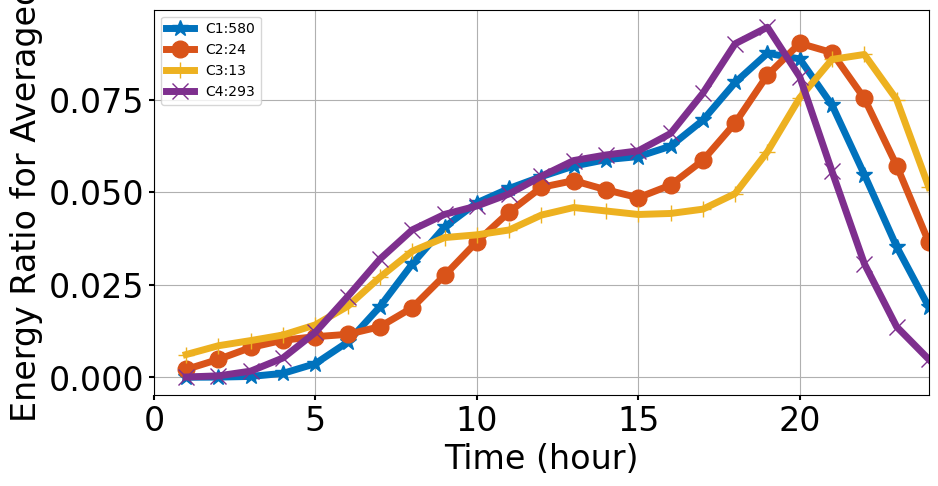

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming centers_OT is already defined and available

x_axis = np.arange(1, 25)
width = 10     # Width in inches
height = 5     # Height in inches
alw = 1.5      # AxesLineWidth
fsz = 24       # Fontsize
lw = 5        # LineWidth
msz = 12       # MarkerSize

K = centers_OT.shape[0]
cluster_sizes = [np.sum(member_id_OT == i) for i in range(K)]
cluster_names = [f'C{i+1}' for i in range(K)]

# Plotting the centroids
plt.figure(figsize=(width, height))
colors = [
    [0, 0.447, 0.741],
    [0.85, 0.325, 0.098],
    [0.929, 0.694, 0.125],
    [0.494, 0.184, 0.556]
]

markers = ['-*', '-o', '-+', '-x']

for i in range(K):
    plt.plot(x_axis, centers_OT[i, :], markers[i], color=colors[i], linewidth=lw, markersize=msz, 
             label=f'{cluster_names[i]}:{cluster_sizes[i]}')
    
# plt.plot(x_axis, centers_OT[0, :], '-*', color=[0, 0.447, 0.741], linewidth=lw, markersize=msz, label='C1:308')
# plt.plot(x_axis, centers_OT[1, :], '-o', color=[0.85, 0.325, 0.098], linewidth=lw, markersize=msz, label='C2:350')
# plt.plot(x_axis, centers_OT[2, :], '-+', color=[0.929, 0.694, 0.125], linewidth=lw, markersize=msz, label='C3:156')
# plt.plot(x_axis, centers_OT[3, :], '-x', color=[0.494, 0.184, 0.556], linewidth=lw, markersize=msz, label='C4:207')
# plt.plot(x_axis, centers_OT[4, :], '--', color=[0.794, 0.384, 0.856], linewidth=lw, markersize=msz, label='C5:207')

plt.legend()
plt.xlim([0, 24])
plt.xlabel('Time (hour)', fontsize=fsz)
plt.ylabel('Energy Ratio for Averaged', fontsize=fsz)
plt.grid(True)
plt.gca().tick_params(axis='both', which='major', labelsize=fsz, width=alw)
plt.gca().tick_params(axis='both', which='minor', labelsize=fsz, width=alw)

plt.show()


In [32]:
K = centers_OT.shape[0]
cluster_sizes = [np.sum(member_id_OT == i) for i in range(K)]
print(cluster_sizes)

[580, 24, 13, 293]


In [33]:
cluster_names = [f'C{i+1}' for i in range(K)]
print(cluster_names)

['C1', 'C2', 'C3', 'C4']
